# Part 10 -- KMeans Clustering

Letting the machine identify clusters of trends in the data.

**Load lib codes**

In [2]:
from os import chdir
chdir('/home/jovyan/work/Analyzing_Unstructured_Data_for_Finance/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()
%matplotlib inline

In [15]:
TSNE_SVD_tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/')

In [16]:
TSNE_SVD_tfidf_10000 = joblib.load('../predicting_stock_market_trends_with_Twitter/data/TSNE_SVD_tfidf_10000.pickle')

**Try different components for KMeans Cluster Model**
K-means is a popular clustering algorithm that tries to distribute a predefined number of points (K) in a way that they end up in the center of our clusters, close to the mean, using Euclidian Distance.
We're going to create 5 clusters using MiniBatchKMeans from scikit-learn, which is a fast implementation of k-means that processes examples in small batches instead of individually.

If K=10, that means we're breaking our data into 5 different clusters and we will have 5 different means. KMeans clustering is getting the means of how many groups we think there are in the data. Evaluate how good the clustering was and picking a K that is actually useful. The means of these clusters are called centroids. They represent the mean of one of the groups in our data.

In [3]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [102]:
km = KMeans(n_clusters=5)
km.fit(TSNE_SVD_tfidf_10000)
km_clusters = km.predict(TSNE_SVD_tfidf_10000)
km_distances = km.transform(TSNE_SVD_tfidf_10000)

In [89]:
kmeans_model = MiniBatchKMeans(n_clusters=10, max_iter=100)
kmeans = kmeans_model.fit(TSNE_SVD_tfidf)
kmeans_clusters = kmeans.predict(TSNE_SVD_tfidf)
kmeans_distances = kmeans.transform(TSNE_SVD_tfidf)

In [99]:
SVD_tfidf = joblib.load('../predicting_stock_market_trends_with_Twitter/data/SVD_tfidf.pickle')

In [68]:
# km_model = MiniBatchKMeans(n_clusters=10, n_init=1, 
#                          init_size=1000, batch_size=1000, verbose=False, max_iter=100)
# km = km_model.fit(TSNE_SVD_tfidf)
# km_clusters = km.predict(TSNE_SVD_tfidf)
# km_distances = km.transform(TSNE_SVD_tfidf)

In [69]:
len(km_model.labels_)

68006

In [103]:
#returns the average silhouette score for your dataset
silhouette_score(TSNE_SVD_tfidf_10000, km.labels_)
#.45 is somewhat close to 1, meaning it is somewhat close to the centroid.

0.37405488518463664

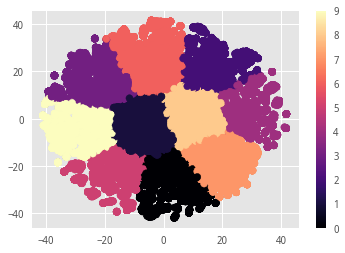

In [61]:
plt.scatter(TSNE_SVD_tfidf[:,0], TSNE_SVD_tfidf[:,1], c=km.labels_, cmap='magma')
plt.colorbar()

In [38]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [51]:
TSNE_SVD_tfidf.shape

(68006, 2)

In [63]:
len(km.labels_)

68006

In [ ]:
#returns the average silhouette score for your dataset
silhouette_score(TSNE_SVD_tfidf_10000, km_10000.labels_)
#.45 is somewhat close to 1, meaning it is somewhat close to the centroid.

In [ ]:
km_model = MiniBatchKMeans(n_clusters=10, n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=100)
km = km_model.fit(TSNE_SVD_tfidf)
km_clusters = km.predict(TSNE_SVD_tfidf)
km_distances = km.transform(TSNE_SVD_tfidf)

Now try it for TSNE_SVD_tfidf_10000

In [44]:
km_10000 = km_model.fit(TSNE_SVD_tfidf_10000)
km_clusters_10000 = km_10000.predict(TSNE_SVD_tfidf_10000)
km_distances_10000 = km_10000.transform(TSNE_SVD_tfidf_10000)

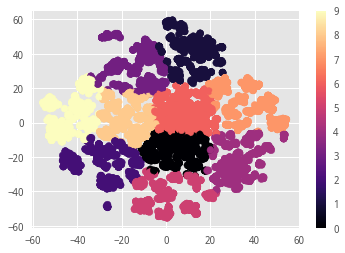

In [45]:
plt.scatter(TSNE_SVD_tfidf_10000[:,0], TSNE_SVD_tfidf_10000[:,1], c=km.labels_, cmap='magma')
plt.colorbar()

The k-means algorithm runs for a few hundred iterations until the centroids don't improve much any more, and then for each tweet, it provides us with the closest centroid and the distance to each cluster centroid.
Let's see which cluster the first five tweets – that we saw earlier – have ended up in:

In [ ]:
for i, tweet in enumerate(tweets):
    if(i < 5):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + tweet["text"] + "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")

To better understand what's in each cluster, let's get the top 10 features (word) for each of our 10 clusters:

In [ ]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for j in sorted_centroids[i, :10]:
        print(' %s' % terms[j], end='')
    print()

### Do an SVD with a lot of n_components to see how many you want to assign later:
Here, we are going to use SVD to reduce the dimensionality to 50 dimensions first, and then use another dimensionality reduction technique called t-SNE that is particularly suited to visualizing high-dimensional datasets, to further reduce the dimensionality to 2.

In [15]:
from sklearn.decomposition import PCA

In [23]:
X_tfidf.shape

(68006, 5268)

In [73]:
# PCA = PCA(n_components = 50)
# PCA_tfidf = PCA.fit_transform(X_tfidf.todense())

In [16]:
# SVD = TruncatedSVD(n_components = 50)
# SVD_tfidf = SVD.fit_transform(X_tfidf.todense())

In [35]:
SVD = TruncatedSVD(n_components = 50)
SVD_tfidf = SVD.fit_transform(X_tfidf[:10000])

In [36]:
SVD_tfidf.shape

(10000, 50)

(0, 0.02)

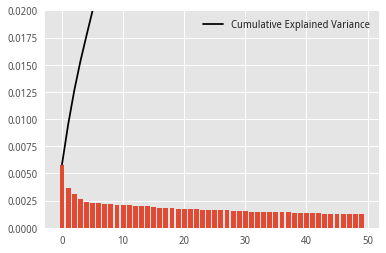

In [62]:
# x = list(range(len(PCA.explained_variance_ratio_)))
# plt.plot(x, np.cumsum(PCA.explained_variance_ratio_), label='Cumulative Explained Variance', color='black')
# plt.bar(x, PCA.explained_variance_ratio_)
# plt.legend()
# plt.ylim(0,.02)
# # plt.xlim(-100,4000)

(0, 0.02)

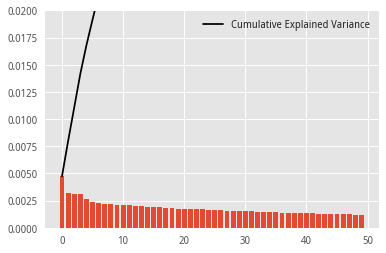

In [63]:
# x = list(range(len(SVD.explained_variance_ratio_)))
# plt.plot(x, np.cumsum(SVD.explained_variance_ratio_), label='Cumulative Explained Variance', color='black')
# plt.bar(x, SVD.explained_variance_ratio_)
# plt.legend()
# plt.ylim(0,.02)
# # plt.xlim(-100,4000)

In [48]:
# np.cumsum(PCA.explained_variance_ratio_)

array([ 0.00582138,  0.00946974,  0.01260373,  0.01528474,  0.01765842,
        0.01996988,  0.022273  ,  0.02447057,  0.02662678,  0.02875104,
        0.03085526,  0.0329165 ,  0.03490785,  0.03687907,  0.03883909,
        0.04077048,  0.04263293,  0.04445822,  0.04626556,  0.04802565,
        0.04977663,  0.05150371,  0.05320916,  0.05488228,  0.05654336,
        0.05820058,  0.05983683,  0.0614369 ,  0.06301206,  0.06456031,
        0.06608598,  0.06759358,  0.06909727,  0.07059266,  0.07207502,
        0.07354405,  0.07498499,  0.07641411,  0.07781693,  0.07920816,
        0.08057334,  0.08193026,  0.08327886,  0.08462004,  0.08594354,
        0.08726069,  0.08857409,  0.08987867,  0.09117529,  0.09246279,
        0.09373832,  0.09500969,  0.09627437,  0.09753642,  0.09879641,
        0.10003533,  0.10126902,  0.10248622,  0.1036982 ,  0.10490238,
        0.10608847,  0.10726719,  0.10843979,  0.10960251,  0.11075749,
        0.11190557,  0.11304554,  0.11417629,  0.11530171,  0.11

In [41]:
# np.cumsum(SVD.explained_variance_ratio_)

array([ 0.00473831,  0.00797087,  0.01106099,  0.01416196,  0.01679716,
        0.01915054,  0.02145472,  0.02366732,  0.02583391,  0.02796623,
        0.03007116,  0.03215208,  0.03414543,  0.03611682,  0.03807729,
        0.04000815,  0.04189375,  0.04373651,  0.04554684,  0.04730044,
        0.04904979,  0.05079186,  0.0525183 ,  0.05421246,  0.05588476,
        0.05754203,  0.05917822,  0.0607708 ,  0.06236665,  0.06393567,
        0.06548315,  0.06700504,  0.06851008,  0.07000825,  0.07149092,
        0.0729603 ,  0.07440765,  0.07583667,  0.07723781,  0.07863499,
        0.07999862,  0.0813622 ,  0.08271517,  0.0840634 ,  0.08539827,
        0.08671815,  0.08803281,  0.08934505,  0.09064466,  0.09193495,
        0.09321146,  0.09448333,  0.09574899,  0.09701166,  0.09827194,
        0.09951493,  0.10074896,  0.1019685 ,  0.10318043,  0.10438352,
        0.10557568,  0.10676011,  0.10793336,  0.10910161,  0.11025896,
        0.11141095,  0.11254969,  0.11368098,  0.11480515,  0.11

<s>With 100 SVD n_components, we can only account for 6% of the variance in the data. We need more. 
With 300 SVD n_components, we can only account for 11% of the variance in the data. **Go back and clean data to see if we get better?**</s><br>
With 300 SVD n_components, we can account for 29% of the variance in the data.
With 200 SVD n_components, we can account for 22% of the variance in the data. 

In [16]:
# def perform_latent_semantic_analysis(n_components, vectorizer):
#     SVD = TruncatedSVD(n_components)
#     component_names = ["component_"+str(i+1) for i in range(n_components)]
#     latent_semantic_analysis = pd.DataFrame(SVD.fit_transform(X_tfidf),
#                                             index = X['cleaned_text'].index,
#                                             columns = component_names)
#     vocabulary_expression = pd.DataFrame(SVD.components_,
#                                          index = component_names,
#                                          columns = vectorizer.get_feature_names())
#     return latent_semantic_analysis, vocabulary_expression

In [48]:
# latent_semantic_analysis, vocabulary_expression = perform_latent_semantic_analysis(3, tfidf)

In [19]:
# latent_semantic_analysis['text'] = X['cleaned_text']
# latent_semantic_analysis['class'] = y_le

In [21]:
# latent_semantic_analysis.sample(10)

,component_1,component_2,component_3,text,class
25103,0.036475,-0.046663,-0.075772,catch up on last week s episode of the equity ...,0
83903,0.007324,-0.008988,-0.007981,ft alphaville guest post why iea scenarios sho...,0
10048,0.036565,-0.043457,-0.023255,jamie oliver about to take stage i think you c...,1
70859,0.013713,-0.020004,-0.018284,this thai startup wants to turn its users into...,0
71966,0.010914,-0.014483,-0.018904,13 beauty products or services that are worth ...,0
34303,0.075677,-0.090003,-0.140216,we re taking a completely new approach to abus...,0
6993,0.017279,-0.027260,-0.010049,economic growth doesn t always improve well be...,0
4611,0.195292,-0.116383,0.178553,rt cnnpolitics president trump on the job repo...,0
56381,0.008814,-0.012495,-0.010974,imagine a stored value card so thin it could b...,0
33389,0.264698,0.135462,0.018691,rt jayleno the tonightshow with guests jerryse...,0


In [22]:
# vocabulary_expression.abs().T.sort_values('component_1', ascending=False).head(10)

,component_1,component_2,component_3
rt,0.861678,0.457639,0.097134
trump,0.180524,0.414735,0.531287
new,0.096028,0.176435,0.314188
president,0.093651,0.303586,0.190468
just,0.087007,0.159127,0.147654
amp,0.085620,0.070823,0.153974
today,0.073437,0.097643,0.141319
people,0.066038,0.123703,0.118793
time,0.066005,0.111455,0.153944
like,0.063773,0.100056,0.146415


In [18]:
!pip install bhtsne

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
from bhtsne import tsne

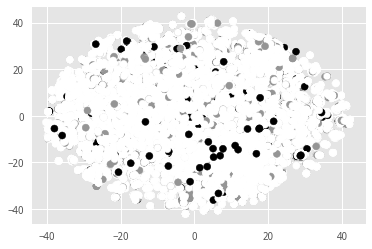

In [117]:
# # Fit on SVD_X_tfidf.data:
# TSNE_SVD_tfidf = tsne(SVD_tfidf.data)
# plt.scatter(TSNE_SVD_tfidf[:, 0], TSNE_SVD_tfidf[:, 1], c=y_le)
# plt.show()

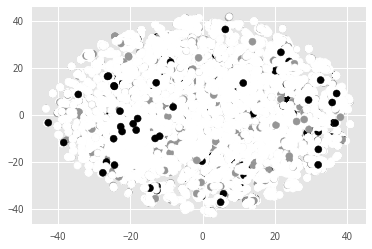

In [105]:
# # Fit on SVD_tfidf:
# TSNE_SVD_tfidf = tsne(SVD_tfidf)
# plt.scatter(TSNE_SVD_tfidf[:, 0], TSNE_SVD_tfidf[:, 1], c=y_le)
# plt.show()

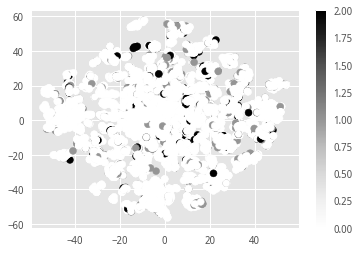

0:01:47.711465


In [24]:
# start = datetime.now()

# # Fit on SVD_X_tfidf[:10000]:
# TSNE_SVD_tfidf = tsne(SVD_tfidf)
# plt.scatter(TSNE_SVD_tfidf[:, 0], TSNE_SVD_tfidf[:, 1], c=y_le[:10000])
# plt.colorbar()
# plt.show()

# end = datetime.now()
# print(end - start)

In [38]:
type(X_tfidf.data)

numpy.ndarray

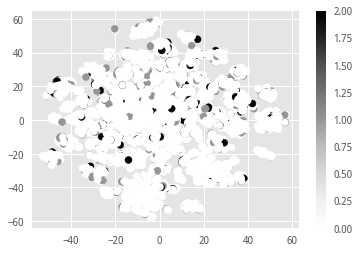

0:01:43.895265


In [37]:
start = datetime.now()

# Fit on SVD_X_tfidf[:10000].data:
TSNE_SVD_tfidf = tsne(SVD_tfidf.data)
plt.scatter(TSNE_SVD_tfidf[:, 0], TSNE_SVD_tfidf[:, 1], c=y_le[:10000])
plt.colorbar()
plt.show()

end = datetime.now()
print(end - start)